In [1]:
'''
Tom Egg
September 14, 2023
Week 2 - Program to Generate Figures (Bullet 4)
'''

'\nTom Egg\nSeptember 14, 2023\nWeek 2 - Program to analyze provided MD results\n'

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import os

# Quantities vs. Time

In [19]:
import pandas as pd

# Initialize empty lists to store data columns
data = [[] for _ in range(7)]  # Assuming 7 columns

# Open the XVG file for reading
with open('Data/1hz3_T310.run.25000000.energy.xvg', 'r') as xvg_file:
    for line in xvg_file:

        # Skip comment lines or header lines
        if line.startswith('#') or line.startswith('@'):
            continue

        # Split the line into columns based on whitespace
        columns = line.strip().split()
        if len(columns) >= 7:
            for i in range(7):
                data[i].append(float(columns[i]))

# Create a DataFrame using pandas
df = pd.DataFrame({
    'Time (ps)': data[0],
    'Potential (kJ/mol)': data[1],
    'Kinetic Energy (K)': data[2],
    'Total Energy (kJ/mol)': data[3],
    'Temperature (K)': data[4],
    'Pressure (bar)': data[5],
    'Volume (nm^3)': data[6]
})

# Rescale time
df['Time (ns)'] = df['Time (ps)'] /10000

# Display the DataFrame
df

,Time (ps),Potential (kJ/mol),Kinetic Energy (K),Total Energy (kJ/mol),Temperature (K),Pressure (bar),Volume (nm^3),Time (ns)
0,0.0,-175680.937500,35128.644531,-140552.296875,309.853302,84.967438,137.956879,0.00
1,100.0,-175387.062500,35737.015625,-139650.046875,315.219452,116.084549,137.819077,0.01
2,200.0,-175059.531250,35401.789062,-139657.750000,312.262573,-85.727356,137.437531,0.02
3,300.0,-175760.984375,35717.289062,-140043.687500,315.045502,269.017548,135.811859,0.03
4,400.0,-174898.718750,35252.562500,-139646.156250,310.946320,-129.284088,137.846680,0.04
...,...,...,...,...,...,...,...,...
496,49600.0,-176148.750000,35003.425781,-141145.328125,308.748810,123.643768,136.727814,4.96
497,49700.0,-175596.437500,35622.363281,-139974.078125,314.208221,76.174149,137.710068,4.97
498,49800.0,-175233.296875,35012.890625,-140220.406250,308.832306,25.778091,138.378967,4.98
499,49900.0,-175552.906250,35534.488281,-140018.421875,313.433105,-133.103729,138.065186,4.99


In [20]:
# Function to plot quantities vs. time
def plot_quantity(quantity, dataframe):
    '''
    @param quantity : the desired quantity
    @param dataframe : dataframe with quantities
    '''

    # Get name of quantity
    title = ''
    for letter in quantity:
        if letter != ' ':
            title += letter
        else:
            break

    # Specify plot
    plt.plot(df['Time (ns)'], dataframe[quantity])
    plt.title(f'{title} vs. Time')
    plt.xlabel('Time (ns)')
    plt.ylabel(quantity)
    plt.show()

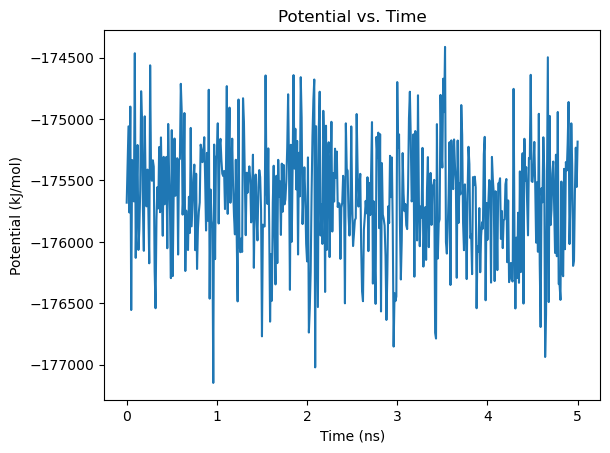

In [21]:
# Plot Potential vs Time
plot_quantity('Potential (kJ/mol)', df)

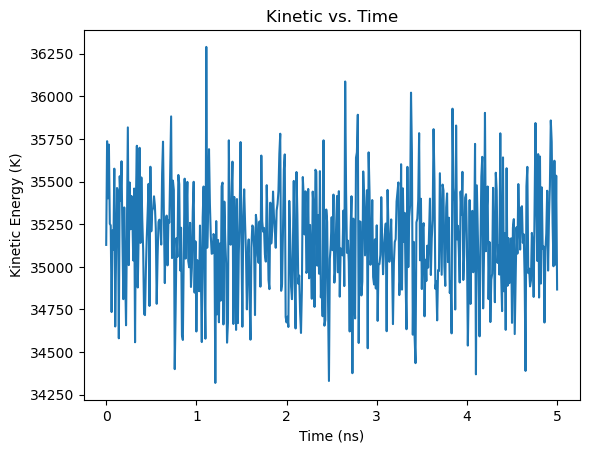

In [22]:
# Plot Kinetic vs Time
plot_quantity('Kinetic Energy (K)', df)

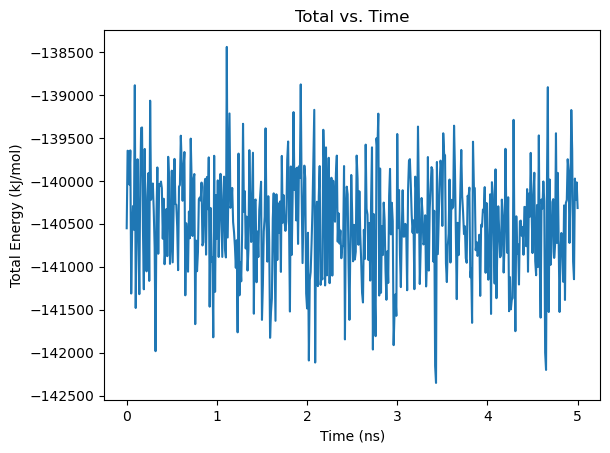

In [23]:
# Plot Total Energy vs time
plot_quantity('Total Energy (kJ/mol)', df)

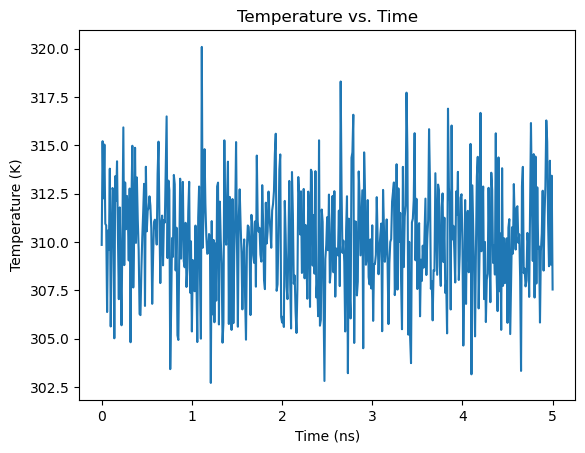

In [24]:
# Plot Temperature vs. Time
plot_quantity('Temperature (K)', df)

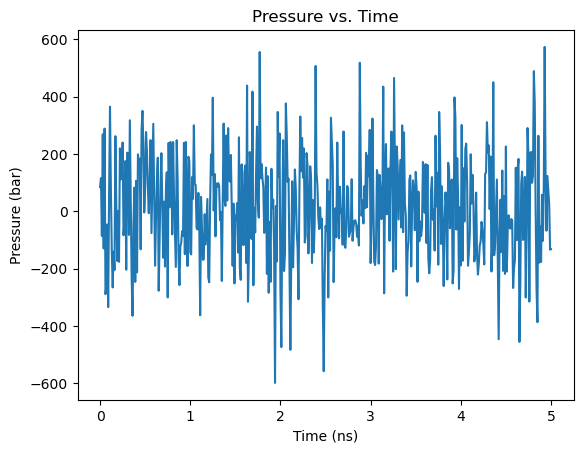

In [25]:
# Plot Pressure vs Time
plot_quantity('Pressure (bar)', df)

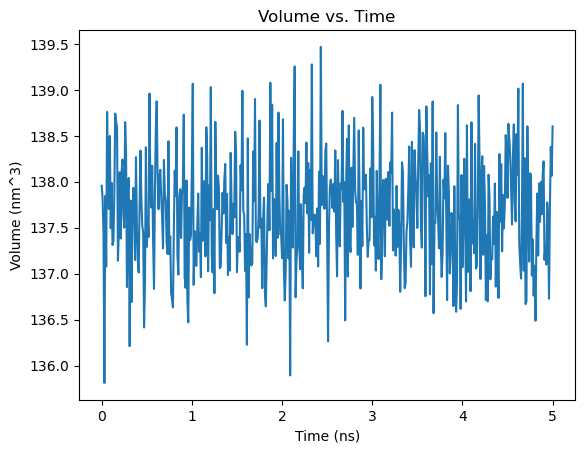

In [26]:
# Volume vs. Time
plot_quantity('Volume (nm^3)', df)

# Temperature with Kinetic Energy

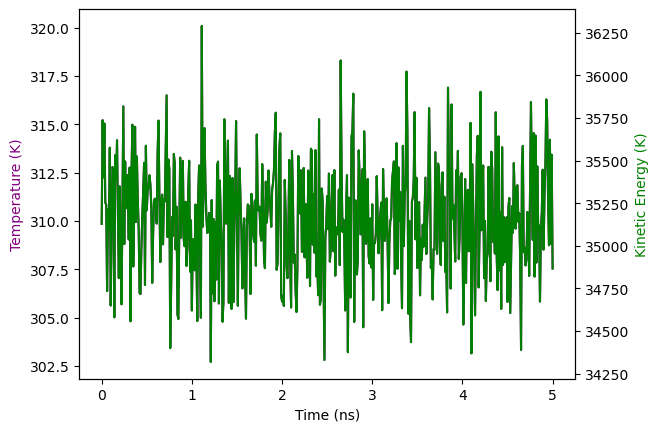

In [29]:
# Create a figure and the first subplot (left y-axis)
fig, ax1 = plt.subplots()

# Plot Temperature vs. Time on the left y-axis
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Temperature (K)', color='purple')  # Specify the color for the left axis
ax1.plot(df['Time (ns)'], df['Temperature (K)'], color='purple', label='Temperature')


# Plot Kinetic Energy vs. Time on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Kinetic Energy (K)', color='green')  # Specify the color for the right axis
ax2.plot(df['Time (ns)'], df['Kinetic Energy (K)'], color='green', label='Kinetic Energy')

# Display the plot
plt.show()